# **PART 1: Gradient Descent**

Dataset loading

In [1]:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from scipy.linalg import norm


In [35]:
df = pd.read_csv('sample_data/california_housing_train.csv')
df1=pd.read_csv('sample_data/california_housing_test.csv')

df.shape

(17000, 9)

Initial Description of the Dataset

In [36]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,17000.0,-119.562108,2.005166,-124.3500,-121.790000,-118.4900,-118.000,-114.3100
latitude,17000.0,35.625225,2.137340,32.5400,33.930000,34.2500,37.720,41.9500
housing_median_age,17000.0,28.589353,12.586937,1.0000,18.000000,29.0000,37.000,52.0000
total_rooms,17000.0,2643.664412,2179.947071,2.0000,1462.000000,2127.0000,3151.250,37937.0000
total_bedrooms,17000.0,539.410824,421.499452,1.0000,297.000000,434.0000,648.250,6445.0000
population,17000.0,1429.573941,1147.852959,3.0000,790.000000,1167.0000,1721.000,35682.0000
households,17000.0,501.221941,384.520841,1.0000,282.000000,409.0000,605.250,6082.0000
median_income,17000.0,3.883578,1.908157,0.4999,2.566375,3.5446,4.767,15.0001
median_house_value,17000.0,207300.912353,115983.764387,14999.0000,119400.000000,180400.0000,265000.000,500001.0000


Distribution of the median house values, the feature we want to predict

<Figure size 720x360 with 0 Axes>

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


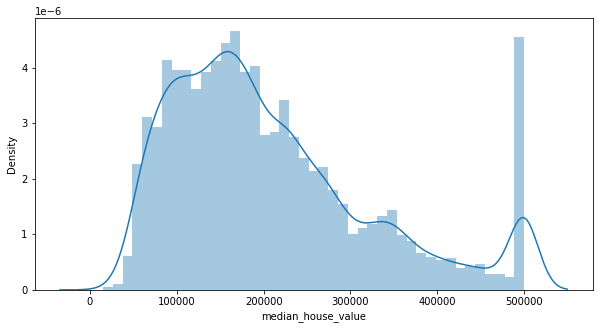

In [37]:
plt.figure(figsize=(10,5))
sns.distplot(df['median_house_value'])

Distribution of the numbers of bedrooms each house have

<Figure size 720x360 with 0 Axes>

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


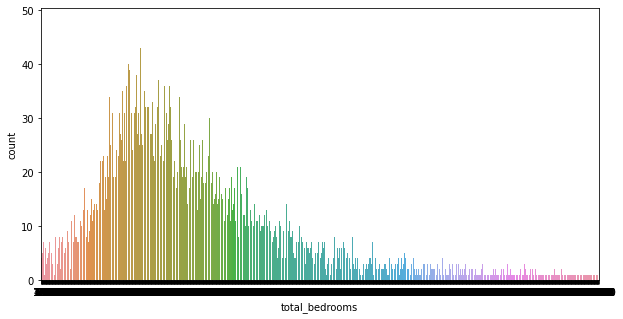

In [9]:

plt.figure(figsize=(10,5))
sns.countplot(df['total_bedrooms'])

The Correlation Matrix of the dataset

<Figure size 864x576 with 0 Axes>

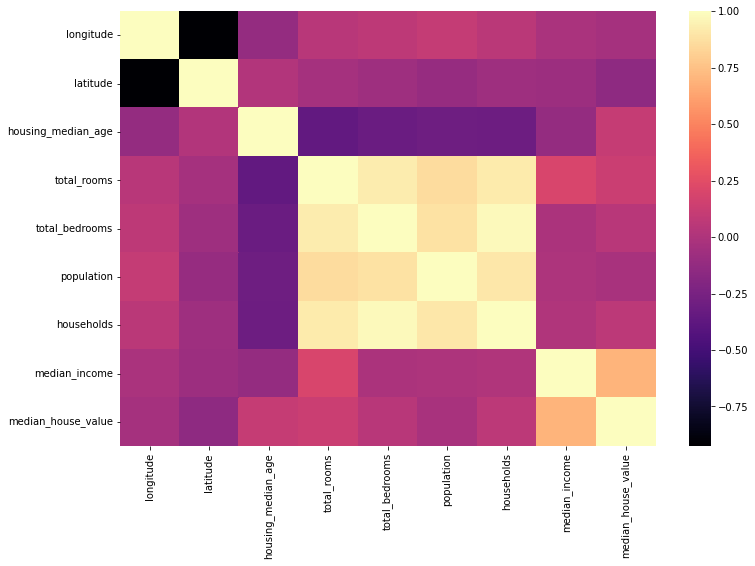

In [10]:
plt.figure(figsize=(12,8))
df_corr = df.corr()
sns.heatmap(df_corr,cmap='magma')




Map of california in function of the median house value


<Figure size 1080x720 with 0 Axes>

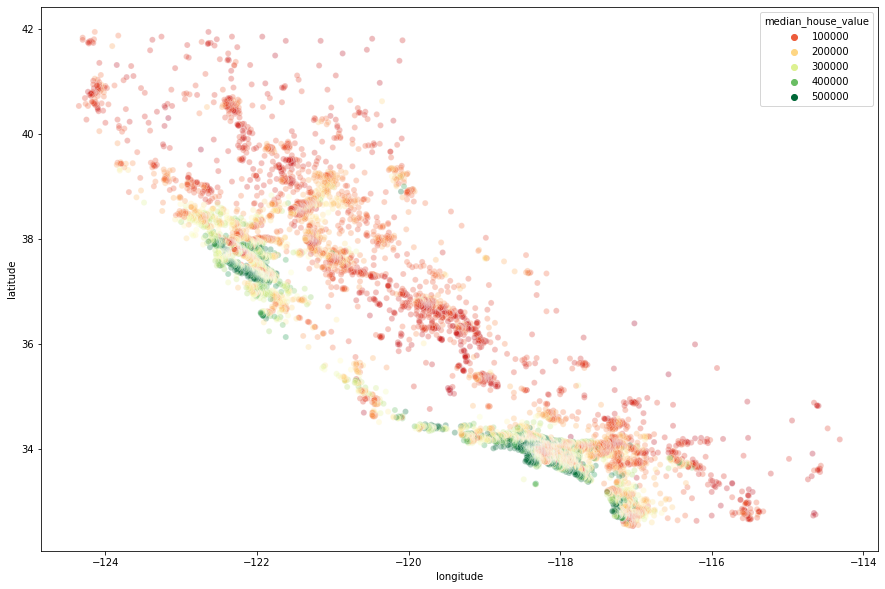

In [38]:
plt.figure(figsize=(15,10))

sns.scatterplot(x = 'longitude',y = 'latitude',data = df[:17000],hue='median_house_value',palette='RdYlGn',alpha = 0.3)

In [111]:
y = df['median_house_value'].values
A=df.drop(['median_house_value'],axis =1).values

In [112]:

A=A[:1000]
y=y[:1000]

mA = A.mean(axis=0)
sA = A.std(axis=0)
A = (A-mA)/sA
m = y.mean()
y = y-m


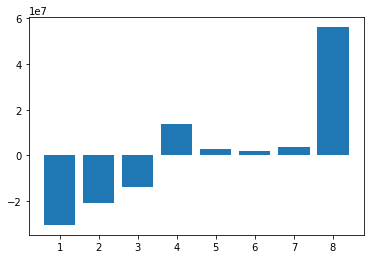

In [113]:
n,p=A.shape
u = A.transpose().dot(y)
plt.clf
plt.bar(np.arange(1,p+1),u.flatten())
plt.axis('tight');

In [114]:
x_min = np.linalg.solve( A.transpose().dot(A), A.transpose().dot(y) )
print(norm(x_min)) #Direct regression solution

61782.571235717645


In [115]:
y1 = df1['median_house_value'].values

A1=df1.drop(['median_house_value'],axis =1).values                ## normalization of the testing set
A1 = (A1-mA)/sA
y1 = y1-m
y1=y1[:300]                                                       ## Restriction of the test set size for fast computing
A1=A1[:300]

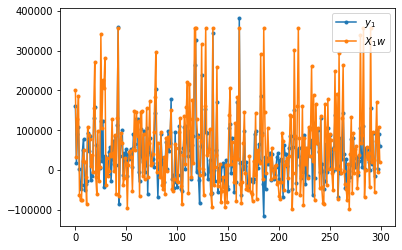

In [116]:
plt.clf
plt.plot( A1.dot(x_min), '.-' )
plt.plot( y1, '.-' )
plt.axis('tight')
plt.legend(('$y_1$', '$X_1 w$'));

In [117]:
E = np.linalg.norm(A1.dot(x_min)-y1) / np.linalg.norm(y1)
print(( 'Relative prediction error: ' + str(E) ) );

Relative prediction error: 0.6355525002414849


Class for regression problems

In [118]:
class RegPb(object):
    '''                                                                   
        A class for regression problems with linear models.
        
        Attributes:
            A: Data matrix (features)
            y: Data vector (labels)
            n,d: Dimensions of A
            loss: Loss function to be considered in the regression
                'l2': Least-squares loss
                'logit': Logistic loss
            lbda: Regularization parameter
    '''
   
    # Instantiate the class
    def __init__(self, A, y,lbda=0):
        self.A = A
        self.y = y
        self.n, self.p = A.shape
       
        self.lbda = lbda
        
    
    # Objective value
    def f(self, x):
      return np.linalg.norm(self.A.dot(x) - self.y) ** 2 / (2. ) + self.lbda * norm(x) ** 2 / 2.
       
    # Partial objective value
    def f_i(self, i, x):
       
      return np.linalg.norm(self.A[i].dot(x) - self.y[i]) ** 2 / (2.) + self.lbda * norm(x) ** 2 / 2.
 
    
    # Full gradient computation
    def grad(self, x):
        
    
        return self.A.T.dot(self.A.dot(x) - self.y)  + self.lbda * x
       
    
    # Partial gradient
    def grad_i(self,i,x):
        a_i = self.A[i]
        
        
        return (a_i.dot(x) - self.y[i]) * a_i + self.lbda*x
      
    def fl1(self,x):
        return self.f(x)+norm(x,ord=1)

    # maximum learning rate  for the gradient
    def tau(self):
        C = A.transpose().dot(A)
        L = norm(C+self.lbda*np.eye(self.p), ord=2) ** 2  
       
        return 1/L
    # optimal learning rate
    def tau_opt(self):
      C = A.transpose().dot(A)
      tau= 2/( norm(C+self.lbda*np.eye(self.p), ord=2) ** 2+ norm(C+self.lbda*np.eye(self.p), ord=-2) ** 2)
      return tau
    

Gradient Descent implementation

In [128]:
def gradientdescent(prob,x0,iter,tau): ## 
  
  s=x0
  L=[]
  val=0
  for i in range(iter):
    
    
    g=prob.grad(s)
    
    s=s - tau*g
    
    val=prob.f(s)
    L.append(val)
  return np.array(L),s


Comparisons of error with different learning rate:


Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'error')

Text(0.5, 1.0, 'Comparisons of error with different learning rate')

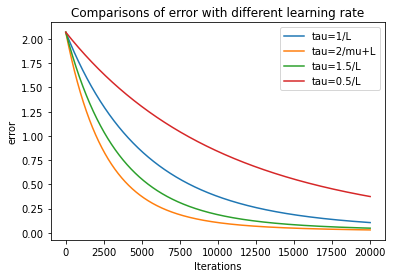

In [129]:
x0=np.zeros(p)                                        ### initialization
prob=RegPb(A,y,0)   
f_min=prob.f(x_min)
                               ### minimum
tau=prob.tau()    
tau_opt=prob.tau_opt()            
L=gradientdescent(prob,x0,20000,tau)[0]
L1=gradientdescent(prob,x0,20000,tau_opt)[0]
L2=gradientdescent(prob,x0,20000,1.5*tau)[0]
L3=gradientdescent(prob,x0,20000,.5*tau)[0]
B=[i   for i in range(len(L1))]
plt.plot(B,L/f_min-1,label='tau=1/L')
plt.plot(B,L1/f_min-1,label='tau=2/mu+L')
plt.plot(B,L2/f_min-1,label='tau=1.5/L')
plt.plot(B,L3/f_min-1,label='tau=0.5/L')
plt.xlabel('Iterations')
plt.ylabel('error')
plt.title('Comparisons of error with different learning rate')

plt.legend()
plt.show()

Error in function of the regularization

In [131]:
lmax = np.linalg.norm(A,2)**2
H=np.linspace(0,50)*lmax

I=[]
E1=[]
for i in range(len(H)):
  p=RegPb(A,y,H[i])
  x=gradientdescent(prob,x0,15000,p.tau_opt())[1]
  I.append(x)
for i in range(len(H)):
  E1.append(np.linalg.norm(A1.dot(I[i])-y1) / np.linalg.norm(y1))


Text(0.5, 0, 'lambda')

Text(0, 0.5, 'relative error')

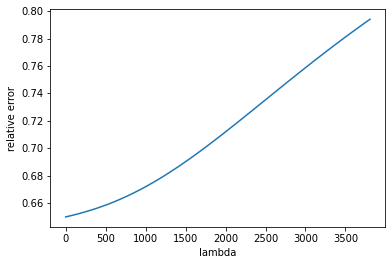

In [133]:
plt.plot(H,E1)
plt.xlabel('lambda')
plt.ylabel('relative error')
plt.show()